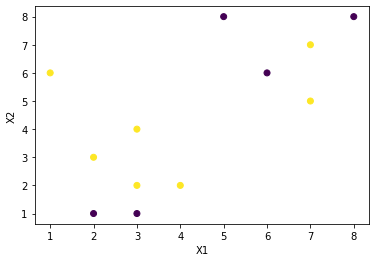

In [87]:
import  numpy as np
import matplotlib.pyplot as plt
x1=[1,2,5,4,3,8,3,2,6,3,7,7]
x2 =[6,3,8,2,4,8,2,1,6,1,7,5]
y=[1,1,0,1,1,0,1,0,0,0,1,1]
plt.scatter(x1,x2,c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np
X=np.array([[1,6],[2,3],[5,8],[4,2],[3,4],[8,8],[3,2],[2,1],[6,6],[3,1],[7,7],[7,5]])

In [3]:
lnr_svc=SVC(kernel='linear')
cross_val_score(lnr_svc,X,y,cv=4).mean()

0.45833333333333326

In [4]:
g=1
rbf_svc=SVC(kernel='rbf',gamma=g)
cross_val_score(rbf_svc,X,y,cv=4).mean()

0.5833333333333333

In [88]:
clf=SVC(kernel='rbf',gamma=g)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
test=[6,1]
print(clf.decision_function([test]))#internally use hyperplane equation to give y
print (clf.predict([test]))#it returns class of given features

[0.30858283]
[1]


RBF Kernal Manually:
    --

In [90]:
import numpy as np
dc=clf.dual_coef_[0]
sqr_eucl_dist=np.square(clf.support_vectors_-test).sum(axis=1)
kernal=np.exp(-g*sqr_eucl_dist)
kernal_dc=dc*kernal
d=kernal_dc.sum()+clf.intercept_
print(d)
if(d<0):
    print(0)
else:
    print(1)

[0.30858283]
1


In [92]:
d=2
poly=SVC(kernel='poly',degree=d,gamma=g,coef0=1)
cross_val_score(poly,X,y,cv=4).mean()

0.7291666666666666

In [93]:
poly.fit(X,y)
print(poly.decision_function([test]))
print(poly.predict([test]))

[1.18645119]
[1]


Polynomial Kernal Manually:
    --

In [94]:
k=g*(poly.support_vectors_@test+poly.coef0)**d
d=np.sum(poly.dual_coef_*k)+poly.intercept_
print(d)
if(d<0):
    print(0)
else:
    print(1)

[1.18645119]
1
